In [3]:
#importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
from Database import Airbnb, creating_engine, creating_session, closing_session

In [4]:
"""#Creating engine
engine1 = creating_engine()

#Creating session
session1 = creating_session(engine1)"""

## Leemos el dataset

In [17]:
df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")
df_airbnb.head(2)

C:\Users\SANTIAGO\AppData\Local\Temp\ipykernel_55016\3544423338.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb=pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
df_airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    df_airbnb
    .dtypes
    .value_counts()
)

object     15
float64     9
int64       2
Name: count, dtype: int64

##  ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
df_airbnb.shape

(102599, 26)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [10]:
(
    df_airbnb
    .isnull()
    .any()
)

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [11]:
(
    df_airbnb
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    df_airbnb
    .isnull()
    .sum()
    .sum()
)

190769

## ¿Cuál es la proporción de valores nulos por cada variable? 

c:\Users\SANTIAGO\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


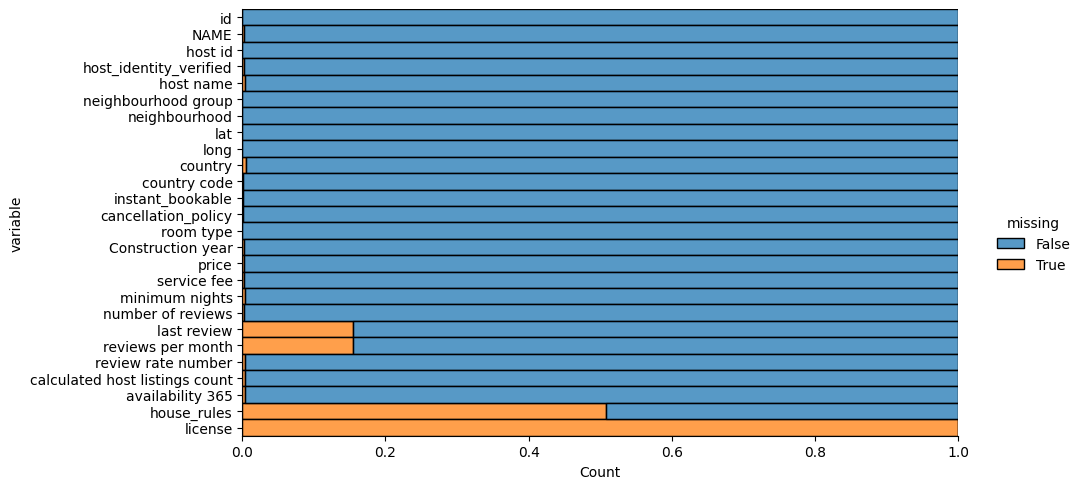

In [12]:
(
    df_airbnb
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

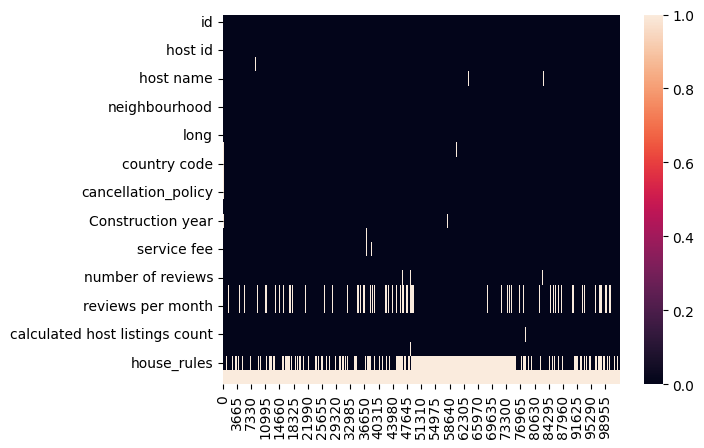

In [18]:
# toca mejorarlo, usando solo unas cuantas columns
(
    df_airbnb
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [19]:
df_airbnb2 = (
    df_airbnb
    .dropna()
)

df_airbnb2

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL


# Conteos y proporciones
## Analisis descriptivo

In [20]:
df_airbnb.describe(include='all')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102349,1.025990e+05,102310,102193,102570,102583,102591.000000,102591.000000,102067,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,NaN,61281,NaN,2,13190,7,224,NaN,NaN,1,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1976,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,1.625751e+07,NaN,2.853900e+10,NaN,NaN,NaN,NaN,0.055857,0.049521,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000,NaN,NaN


## Solo las numericas

In [21]:
df_airbnb.describe(include=[np.number])

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
## Solo categoricas

In [22]:
df_airbnb.describe(include=object)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
count,102349,102310,102193,102570,102583,102067,102468,102494,102523,102599,102352,102326,86706,50468,2
unique,61281,2,13190,7,224,1,1,2,3,4,1151,231,2477,1976,1
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?,41662/AL
freq,33,51200,881,43792,7937,102067,102468,51474,34343,53701,137,526,2443,2712,2


## visualizando los conteos?

<Axes: xlabel='neighbourhood'>

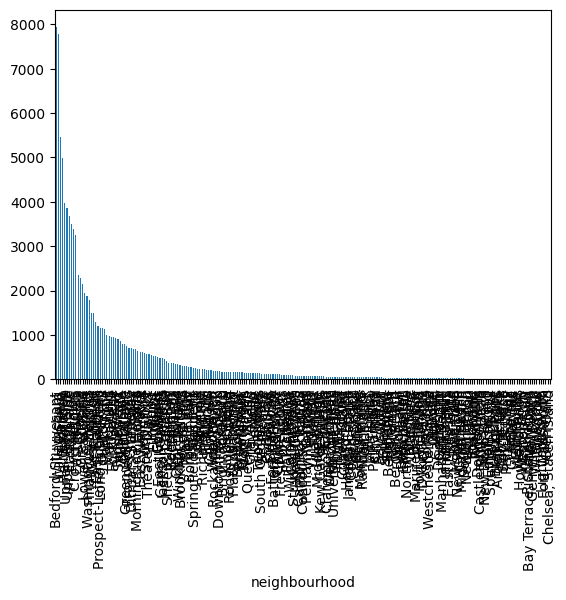

In [23]:
(
    df_airbnb
    .neighbourhood 
    .value_counts()
    .plot(
        kind='bar',
        # color=penguin_color.values()
    )
)

In [24]:
df_airbnb.max()

TypeError: '>=' not supported between instances of 'str' and 'float'

In [33]:
df_airbnb.min()


C:\Users\Guatavo\AppData\Local\Temp\ipykernel_15864\1214028722.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.min()


id                                        1001254
host id                                 123600518
lat                                      40.49979
long                                    -74.24984
instant_bookable                            False
room type                         Entire home/apt
Construction year                          2003.0
minimum nights                            -1223.0
number of reviews                             0.0
reviews per month                            0.01
review rate number                            1.0
calculated host listings count                1.0
availability 365                            -10.0
dtype: object